# Geochronology from the Franklin LIP and Cryogenian glacial successions

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from geochron_functions import plot_dates
from geochron_functions import weighted_mean

## Individual zircon dates

### Ethiopia

In [2]:
# Park et al. (2018)
T39_420_2Z = pd.read_csv('../data/geochron/Ethiopia/T39-420_2Z.csv')
T39_108_0Z = pd.read_csv('../data/geochron/Ethiopia/T39-108_0Z.csv')
T1b_439_8Z = pd.read_csv('../data/geochron/Ethiopia/T1b-439_8Z.csv')

# MacLennan et al. (2018)
SAM_ET_03 = pd.read_csv('../data/geochron/Ethiopia/SAM-ET-03.csv')
SAM_ET_04 = pd.read_csv('../data/geochron/Ethiopia/SAM-ET-04.csv')
T46_102_2Z = pd.read_csv('../data/geochron/Ethiopia/T46-102_2Z.csv')

# Swanson-Hysell et al. (2015)
T1_12_3 = pd.read_csv('../data/geochron/Ethiopia/T1-12_3.csv')
T1_1202 = pd.read_csv('../data/geochron/Ethiopia/T1-1202.csv')
T2 = pd.read_csv('../data/geochron/Ethiopia/T2.csv')
T22_453 = pd.read_csv('../data/geochron/Ethiopia/T22-453.csv')
TS22 = pd.read_csv('../data/geochron/Ethiopia/TS22.csv')
TS23 = pd.read_csv('../data/geochron/Ethiopia/TS23.csv')

# sort
T39_420_2Z.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T39_108_0Z.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T1b_439_8Z.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
SAM_ET_03.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
SAM_ET_04.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T46_102_2Z.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T1_12_3.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T1_1202.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T2.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T22_453.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
TS22.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
TS23.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)

T39_420_2Z.reset_index(inplace=True, drop=True)
T39_108_0Z.reset_index(inplace=True, drop=True)
T1b_439_8Z.reset_index(inplace=True, drop=True)
SAM_ET_03.reset_index(inplace=True, drop=True)
SAM_ET_04.reset_index(inplace=True, drop=True)
T46_102_2Z.reset_index(inplace=True, drop=True)
T1_12_3.reset_index(inplace=True, drop=True)
T1_1202.reset_index(inplace=True, drop=True)
T2.reset_index(inplace=True, drop=True)
T22_453.reset_index(inplace=True, drop=True)
TS22.reset_index(inplace=True, drop=True)
TS23.reset_index(inplace=True, drop=True)

In [3]:
zircon_means = [T39_420_2Z['206Pb/238U'],
                T39_108_0Z['206Pb/238U'],
                T1b_439_8Z['206Pb/238U'],
                SAM_ET_03['206Pb/238U'],
                SAM_ET_04['206Pb/238U'],
                T46_102_2Z['206Pb/238U'],
                T1_12_3['206Pb/238U'],
                T1_1202['206Pb/238U'],
                T2['206Pb/238U'],
                T22_453['206Pb/238U'],
                TS22['206Pb/238U'],
                TS23['206Pb/238U']]
zircon_2sigmas = [T39_420_2Z['206Pb/238U_2sigma'],
                  T39_108_0Z['206Pb/238U_2sigma'],
                  T1b_439_8Z['206Pb/238U_2sigma'],
                  SAM_ET_03['206Pb/238U_2sigma'],
                  SAM_ET_04['206Pb/238U_2sigma'],
                  T46_102_2Z['206Pb/238U_2sigma'],
                  T1_12_3['206Pb/238U_2sigma'],
                  T1_1202['206Pb/238U_2sigma'],
                  T2['206Pb/238U_2sigma'],
                  T22_453['206Pb/238U_2sigma'],
                  TS22['206Pb/238U_2sigma'],
                  TS23['206Pb/238U_2sigma']]
include = [T39_420_2Z['include'],
           T39_108_0Z['include'],
           T1b_439_8Z['include'],
           SAM_ET_03['include'],
           SAM_ET_04['include'],
           T46_102_2Z['include'],
           T1_12_3['include'],
           T1_1202['include'],
           T2['include'],
           T22_453['include'],
           TS22['include'],
           TS23['include']]
sample_means = [794.28,
                795.59,
                823.2,
                719.58,
                719.68,
                735.25,
                821.2,
                787.38,
                788.72,
                776.9,
                815.29,
                794.2]
sample_2sigmas = [0.44,
                  0.82,
                  1.1,
                  0.56,
                  0.46,
                  0.25,
                  1.5,
                  0.14,
                  0.24,
                  0.8,
                  0.32,
                  0.7]
colours = ['darkorange',
           'darkorange',
           'darkorange',
           'darkorange',
           'darkorange',
           'darkorange',
           'darkorange',
           'darkorange',
           'darkorange',
           'darkorange',
           'darkorange',
           'darkorange']
labels = ['T39-420.2Z - Park et al. (2020)',
          'T39-108.0Z - Park et al. (2020)',
          'T1b-439.8Z - Park et al. (2020)',
          'SAM-ET-03 - MacLennan et al. (2018)',
          'SAM-ET-04 - MacLennan et al. (2018)',
          'T46-102.2Z - MacLennan et al. (2018)',
          'T1-12.3 - Swanson-Hysell et al. (2015)',
          'T1-1202 - Swanson-Hysell et al. (2015)',
          'T2 - Swanson-Hysell et al. (2015)',
          'T22-453 - Swanson-Hysell et al. (2015)',
          'TS22 - Swanson-Hysell et al. (2015)',
          'TS23 - Swanson-Hysell et al. (2015)']

all_zircon_means = []
all_zircon_2sigmas = []
all_include = []
all_sample_means = []
all_sample_2sigmas = []
all_colours = []
all_labels = []

all_zircon_means.extend(zircon_means)
all_zircon_2sigmas.extend(zircon_2sigmas)
all_include.extend(include)
all_sample_means.extend(sample_means)
all_sample_2sigmas.extend(sample_2sigmas)
all_colours.extend(colours)
all_labels.extend(labels)

### Laurentia - Cox et al. (2015)

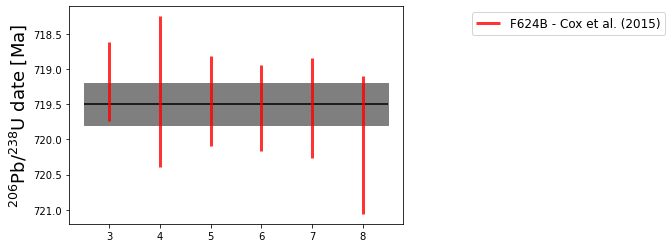

In [4]:
Cox2015 = pd.read_csv('../data/geochron/Laurentia/Cox2015_data.csv')

Cox2015.sort_values('206Pb/238U', inplace=True)
Cox2015 = Cox2015[Cox2015['include'] == 'yes']
Cox2015.reset_index(inplace=True, drop=True)

zircon_means = [Cox2015['206Pb/238U']]
zircon_2sigmas = [Cox2015['206Pb/238U_2sigma']]
include = [Cox2015['include']]
sample_means = [719.5]
sample_2sigmas = [0.3]
colours = ['r']
labels = ['F624B - Cox et al. (2015)']

all_zircon_means.extend(zircon_means)
all_zircon_2sigmas.extend(zircon_2sigmas)
all_include.extend(include)
all_sample_means.extend(sample_means)
all_sample_2sigmas.extend(sample_2sigmas)
all_colours.extend(colours)
all_labels.extend(labels)

fig, ax = plot_dates(zircon_means, zircon_2sigmas, include, sample_means, sample_2sigmas, colours, labels)
plt.show(fig)

## Laurentia - Macdonald et al. (2010)

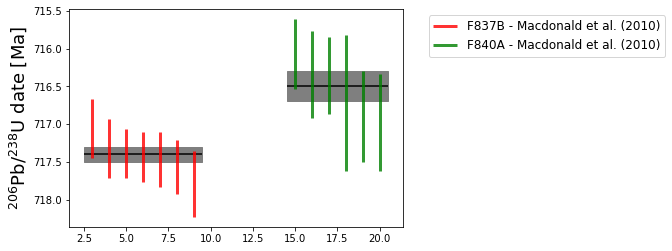

In [5]:
Macdonald2010 = pd.read_csv('../data/geochron/Laurentia/Macdonald2010_data.csv')
Macdonald2010 = Macdonald2010[Macdonald2010['include'] == 'yes']

F837B = Macdonald2010[Macdonald2010['sample']=='F837B'].copy()
F840A = Macdonald2010[Macdonald2010['sample']=='F840A'].copy()

F837B.sort_values('206Pb/238U', inplace=True)
F840A.sort_values('206Pb/238U', inplace=True)

F837B.reset_index(inplace=True, drop=True)
F840A.reset_index(inplace=True, drop=True)

zircon_means = [F837B['206Pb/238U'], F840A['206Pb/238U']]
zircon_2sigmas = [F837B['206Pb/238U_2sigma'], F840A['206Pb/238U_2sigma']]
include = [F837B['include'], F840A['include']]
sample_means = [717.4, 716.5]
sample_2sigmas = [0.1, 0.2]
colours = ['r', 'g']
labels = ['F837B - Macdonald et al. (2010)', 'F840A - Macdonald et al. (2010)']

all_zircon_means.extend(zircon_means)
all_zircon_2sigmas.extend(zircon_2sigmas)
all_include.extend(include)
all_sample_means.extend(sample_means)
all_sample_2sigmas.extend(sample_2sigmas)
all_colours.extend(colours)
all_labels.extend(labels)

fig, ax = plot_dates(zircon_means, zircon_2sigmas, include, sample_means, sample_2sigmas, colours, labels)
plt.show(fig)

## Laurentia - Macdonald et al. (2017)

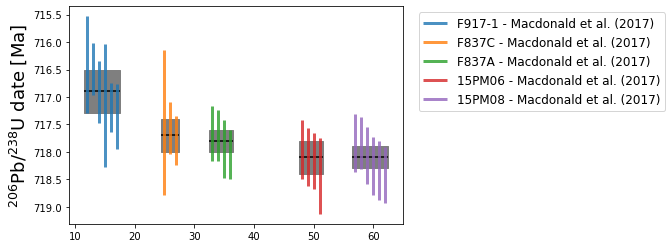

In [15]:
Macdonald2017 = pd.read_csv('../data/Geochron/Laurentia//Macdonald2017_data.csv')
Macdonald2017 = Macdonald2017[Macdonald2017['include'] == 'yes']

F917_1 = Macdonald2017[Macdonald2017['sample']=='F917-1'].copy()
F837C = Macdonald2017[Macdonald2017['sample']=='F837C'].copy()
F837A = Macdonald2017[Macdonald2017['sample']=='F837A'].copy()
_15PM06 = Macdonald2017[Macdonald2017['sample']=='15PM06'].copy()
_15PM08 = Macdonald2017[Macdonald2017['sample']=='15PM08'].copy()

F917_1.sort_values('206Pb/238U', inplace=True)
F837C.sort_values('206Pb/238U', inplace=True)
F837A.sort_values('206Pb/238U', inplace=True)
_15PM06.sort_values('206Pb/238U', inplace=True)
_15PM08.sort_values('206Pb/238U', inplace=True)

F917_1.reset_index(inplace=True, drop=True)
F837C.reset_index(inplace=True, drop=True)
F837A.reset_index(inplace=True, drop=True)
_15PM06.reset_index(inplace=True, drop=True)
_15PM08.reset_index(inplace=True, drop=True)

zircon_means = [F917_1['206Pb/238U'], F837C['206Pb/238U'], F837A['206Pb/238U'],
                _15PM06['206Pb/238U'], _15PM08['206Pb/238U']]
zircon_2sigmas = [F917_1['206Pb/238U_2sigma'], F837C['206Pb/238U_2sigma'], F837A['206Pb/238U_2sigma'],
                  _15PM06['206Pb/238U_2sigma'], _15PM08['206Pb/238U_2sigma']]
include = [F917_1['include'], F837C['include'], F837A['include'],
           _15PM06['include'], _15PM08['include']]
sample_means = [716.9, 717.7, 717.8, 718.1, 718.1]
sample_2sigmas = [0.4, 0.3, 0.2, 0.3, 0.2]
colours = ['C0', 'C1', 'C2', 'C3', 'C4']
labels = ['F917-1 - Macdonald et al. (2017)', 'F837C - Macdonald et al. (2017)', 'F837A - Macdonald et al. (2017)',
          '15PM06 - Macdonald et al. (2017)', '15PM08 - Macdonald et al. (2017)']

all_zircon_means.extend(zircon_means)
all_zircon_2sigmas.extend(zircon_2sigmas)
all_include.extend(include)
all_sample_means.extend(sample_means)
all_sample_2sigmas.extend(sample_2sigmas)
all_colours.extend(colours)
all_labels.extend(labels)

fig, ax = plot_dates(zircon_means, zircon_2sigmas, include, sample_means, sample_2sigmas, colours, labels)
plt.show(fig)

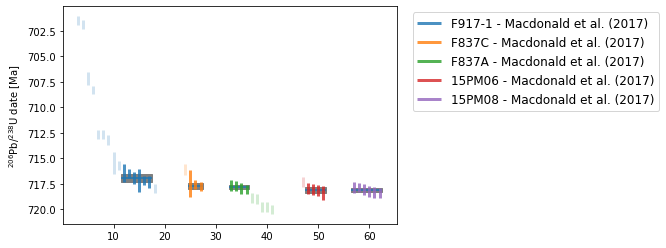

## South China - Lan et al. (2014)

Split the data into the SC05 and SC06 samples:

In [14]:
Lan2014 = pd.read_csv('Data/Lan2014_data.csv')

SC05 = Lan2014[Lan2014['sample']=='Gongdong Formation (2013SC05)'].copy()
SC06 = Lan2014[Lan2014['sample']=='Gongdong Formation (2013SC06)'].copy()

SC05.sort_values('206Pb/238U', inplace=True)
SC06.sort_values('206Pb/238U', inplace=True)

SC05.reset_index(inplace=True, drop=True)
SC06.reset_index(inplace=True, drop=True)

Convert to 2 sigma uncertainty:

In [15]:
SC05['206Pb/238U_2sigma'] = SC05['206Pb/238U_1sigma'] * 2
SC06['206Pb/238U_2sigma'] = SC06['206Pb/238U_1sigma'] * 2

Since it is unclear how they arrived at a weighted mean age, we'll calculate it ourselves using the X youngest grains:

In [16]:
SC05_mean, SC05_2sigma = weighted_mean(SC05['206Pb/238U'][0:11], SC05['206Pb/238U_1sigma'][0:11])

The weighted mean is:
716.5284441688405
With a 2sigma error of:
4.332781339084966
N=
11


In [17]:
SC06_mean, SC06_2sigma = weighted_mean(SC06['206Pb/238U'][0:20], SC06['206Pb/238U_1sigma'][0:20])

The weighted mean is:
715.8154445831767
With a 2sigma error of:
3.053875714661158
N=
20


Mark the grains that are included in our weighted mean:

In [18]:
for i in range(len(SC05.index)):
    if i < 11:
        SC05.loc[i, 'include'] = 'yes'
    else:
        SC05.loc[i, 'include'] = 'no'
        
for i in range(len(SC06.index)):
    if i < 20:
        SC06.loc[i, 'include'] = 'yes'
    else:
        SC06.loc[i, 'include'] = 'no'

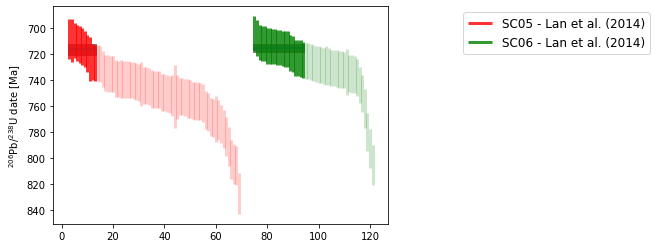

In [19]:
zircon_means = [SC05['206Pb/238U'], SC06['206Pb/238U']]
zircon_2sigmas = [SC05['206Pb/238U_2sigma'], SC06['206Pb/238U_2sigma']]
include = [SC05['include'], SC06['include']]
sample_means = [SC05_mean, SC06_mean]
sample_2sigmas = [SC05_2sigma, SC06_2sigma]
colours = ['r', 'g']
labels = ['SC05 - Lan et al. (2014)', 'SC06 - Lan et al. (2014)']

all_zircon_means.extend(zircon_means)
all_zircon_2sigmas.extend(zircon_2sigmas)
all_include.extend(include)
all_sample_means.extend(sample_means)
all_sample_2sigmas.extend(sample_2sigmas)
all_colours.extend(colours)
all_labels.extend(labels)

fig, ax = plot_dates(zircon_means, zircon_2sigmas, include, sample_means, sample_2sigmas, colours, labels)
plt.show(fig)

## South China - Lan et al. 2020

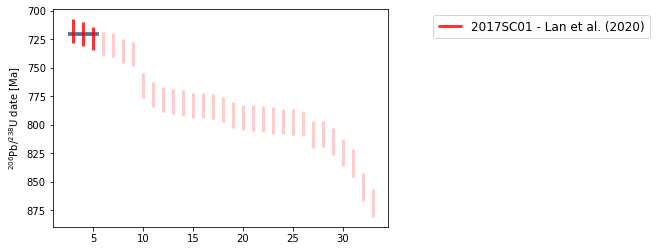

In [51]:
Lan2020 = pd.read_excel('Data/1-s2.0-S0301926819303249-mmc2.xls',
                        sheet_name = 'data',header=1)

zircon_means = [Lan2020['206Pb/238U.1']]
zircon_2sigmas = [Lan2020['±s.2']]
include = [Lan2020['include']]

Lan2020['206Pb/238U'] = Lan2020['206Pb/238U.1']
Lan2020['206Pb/238U_2sigma'] = Lan2020['±s.2']

sample_means = [720.16]
sample_2sigmas = [1.4]
colours = ['r']
labels = ['2017SC01 - Lan et al. (2020)']

fig, ax = plot_dates(zircon_means, zircon_2sigmas, include, sample_means, sample_2sigmas, colours, labels)
plt.show(fig)

## Oman - Bowring et al. (2007)

In [20]:
Bowring2007 = pd.read_csv('Data/Bowring2007_data.csv')

Bowring2007['206Pb/238U_2sigma'] = Bowring2007['206Pb/238U'] * (Bowring2007['206Pb/238U_2sigma_perc']/100)

Bowring2007.sort_values('206Pb/238U', inplace=True)

Bowring2007.reset_index(inplace=True, drop=True)

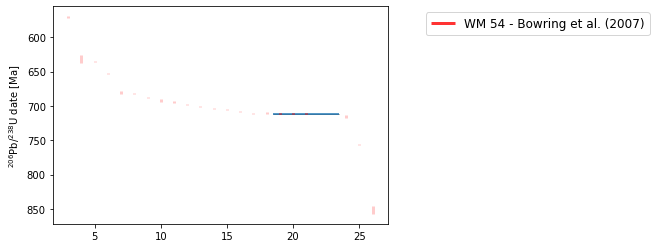

In [21]:
zircon_means = [Bowring2007['206Pb/238U']]
zircon_2sigmas = [Bowring2007['206Pb/238U_2sigma']]
include = [Bowring2007['include']]
sample_means = [711.5]
sample_2sigmas = [0.3]
colours = ['r']
labels = ['WM 54 - Bowring et al. (2007)']

all_zircon_means.extend(zircon_means)
all_zircon_2sigmas.extend(zircon_2sigmas)
all_include.extend(include)
all_sample_means.extend(sample_means)
all_sample_2sigmas.extend(sample_2sigmas)
all_colours.extend(colours)
all_labels.extend(labels)

fig, ax = plot_dates(zircon_means, zircon_2sigmas, include, sample_means, sample_2sigmas, colours, labels)
plt.show(fig)

# All Zircons

In [22]:
# colour map
color_idx = np.linspace(0, 1, len(all_colours))
all_colours = plt.cm.winter(color_idx)

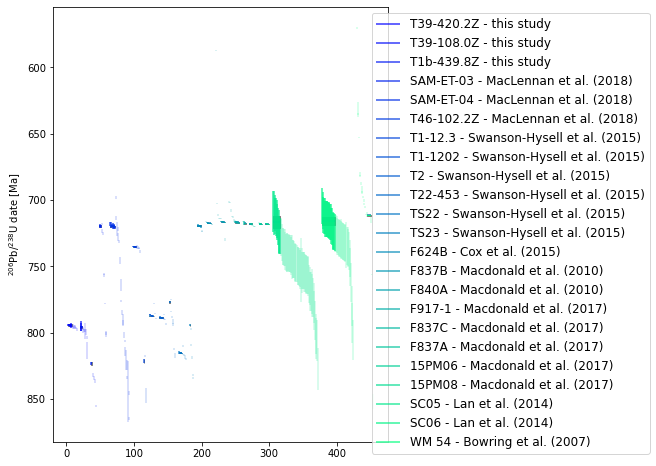

In [23]:
fig, ax = plot_dates(all_zircon_means, all_zircon_2sigmas, all_include,\
                     all_sample_means, all_sample_2sigmas, all_colours, all_labels,\
                     figsize=(6,8), lineweight=1.5)
plt.show(fig)

# Monte Carlo Results

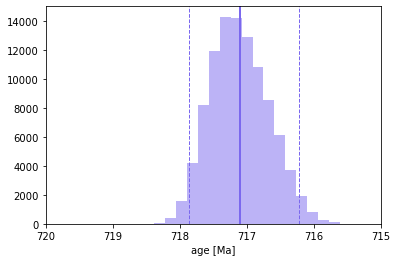

In [24]:
MC_results = np.loadtxt('MC_results_mapped.csv')

MC_mean = np.mean(MC_results)
MC_2_5 = stats.scoreatpercentile(MC_results, 2.5)
MC_97_5 = stats.scoreatpercentile(MC_results, 97.5)

fig, ax = plt.subplots()

ax.hist(MC_results, bins=20, histtype='stepfilled', color='mediumslateblue', alpha=0.5)
ax.axvline(MC_mean, color='mediumslateblue', lw=2)
ax.axvline(MC_2_5, color='mediumslateblue', lw=1, ls='--')
ax.axvline(MC_97_5, color='mediumslateblue', lw=1, ls='--')
ax.set_xlabel('age [Ma]')
ax.set_xlim(720,715)

plt.show(fig)

# Zircons with Monte Carlo - without Macdonald et al. (2017)

## Split Macdonald et al. (2010) F840A

## Extract Data Between ylims

In [25]:
ylim = (725,705)

dfs = [SAM_ET_03, SAM_ET_04, Cox2015, F837B, F840A, Bowring2007, SC05, SC06]

select_sample_means = [719.58,
                       719.68,
                       719.5,
                       717.4,
                       716.5,
                       711.5,
                       SC05_mean,
                       SC06_mean]
select_sample_2sigmas = [0.56,
                         0.46,
                         0.3,
                         0.1,
                         0.2,
                         0.3,
                         SC05_2sigma,
                         SC06_2sigma]
select_colours = ['darkorange',
                  'darkorange',
                  'firebrick',
                  'firebrick',
                  'dodgerblue',
                  'dodgerblue',
                  'firebrick',
                  'firebrick']
select_labels = ['SAM-ET-03 - this study',
                 'SAM-ET-04 - this study',
                 'F624B - Cox et al. (2015)',
                 'F837B - Macdonald et al. (2010)',
                 'F840A - Macdonald et al. (2010)',
                 'WM 54 - Bowring et al. (2007)',
                 'SC05 - Lan et al. (2014)',
                 'SC06 - Lan et al. (2014)']

select_zircon_means = []
select_zircon_2sigmas = []
select_include = []

for i in range(len(dfs)):
    df = dfs[i].copy()
    
    df['bar_bot'] = df['206Pb/238U'] + df['206Pb/238U_2sigma']
    df['bar_top'] = df['206Pb/238U'] - df['206Pb/238U_2sigma']
    
    df = df[(df['bar_bot']>=ylim[1]) & (df['bar_top']<=ylim[0])]
    
    df.reset_index(inplace=True, drop=True)
    
    select_zircon_means.append(df['206Pb/238U'])
    select_zircon_2sigmas.append(df['206Pb/238U_2sigma'])
    select_include.append(df['include'])

## Plot

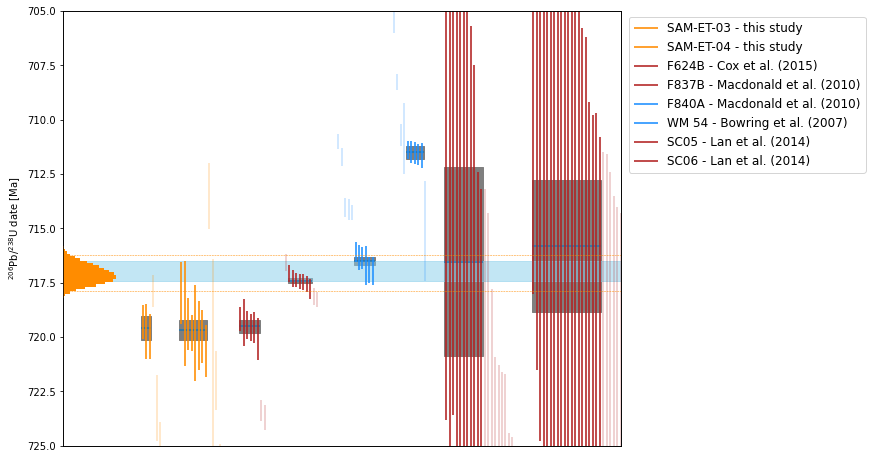

In [26]:
xlim = (-20,140)

# zircons
fig, ax = plot_dates(select_zircon_means, select_zircon_2sigmas, select_include,\
                     select_sample_means, select_sample_2sigmas, select_colours, select_labels,\
                     figsize=(10,8), lineweight=2.0, bbox_to_anchor=(1.45,1))
ax.set_xlim(xlim)
ax.set_xticks([])

# sturtian start
rectangle = matplotlib.patches.Rectangle((xlim[0], 716.5),\
                                         (xlim[1]-xlim[0]), 717.4-716.5, color='skyblue', alpha=0.5)
ax.add_patch(rectangle)

# MC results
twinax = ax.twiny()
twinax.hist(MC_results, bins=30, histtype='stepfilled', orientation='horizontal', color='darkorange')
ax.axhline(MC_2_5, color='darkorange', lw=0.5, ls='--')
ax.axhline(MC_97_5, color='darkorange', lw=0.5, ls='--')
twinax.set_xlim(0,100000)
twinax.set_xticks([])
twinax.set_ylim(ylim)

#plt.savefig('../Manuscript/Figures/Zircons_MC_v1.pdf')

plt.show(fig)

# Zircons with Monte Carlo - with Macdonald et al. (2017)

## Extract Data Between ylims

In [27]:
ylim = (725,705)

dfs = [SAM_ET_03, SAM_ET_04, Cox2015, _15PM08, _15PM06, F837A, F837C, F837B, F917_1, F840A, Bowring2007, SC05, SC06]

select_sample_means = [719.58,
                       719.68,
                       719.5,
                       718.1,
                       718.1,
                       717.8,
                       717.7,
                       717.4,
                       716.9,
                       716.5,
                       711.5,
                       SC05_mean,
                       SC06_mean]
select_sample_2sigmas = [0.56,
                         0.46,
                         0.3,
                         0.2,
                         0.3,
                         0.2,
                         0.3,
                         0.1,
                         0.4,
                         0.2,
                         0.3,
                         SC05_2sigma,
                         SC06_2sigma]
select_colours = ['darkorange',
                  'darkorange',
                  'firebrick',
                  'firebrick',
                  'firebrick',
                  'firebrick',
                  'firebrick',
                  'firebrick',
                  'dodgerblue',
                  'dodgerblue',
                  'dodgerblue',
                  'firebrick',
                  'firebrick']
select_labels = ['SAM-ET-03 - this study',
                 'SAM-ET-04 - this study',
                 'F624B - Cox et al. (2015)',
                 '15PM08 - Macdonald et al. (2017)',
                 '15PM06 - Macdonald et al. (2017)',
                 'F837A - Macdonald et al. (2017)',
                 'F837C - Macdonald et al. (2017)',
                 'F837B - Macdonald et al. (2010)',
                 'F917-1 - Macdonald et al. (2017)',
                 'F840A - Macdonald et al. (2010)',
                 'WM 54 - Bowring et al. (2007)',
                 'SC05 - Lan et al. (2014)',
                 'SC06 - Lan et al. (2014)']

select_zircon_means = []
select_zircon_2sigmas = []
select_include = []

for i in range(len(dfs)):
    df = dfs[i].copy()
    
    df['bar_bot'] = df['206Pb/238U'] + df['206Pb/238U_2sigma']
    df['bar_top'] = df['206Pb/238U'] - df['206Pb/238U_2sigma']
    
    df = df[(df['bar_bot']>=ylim[1]) & (df['bar_top']<=ylim[0])]
    
    df.reset_index(inplace=True, drop=True)
    
    select_zircon_means.append(df['206Pb/238U'])
    select_zircon_2sigmas.append(df['206Pb/238U_2sigma'])
    select_include.append(df['include'])

## Plot

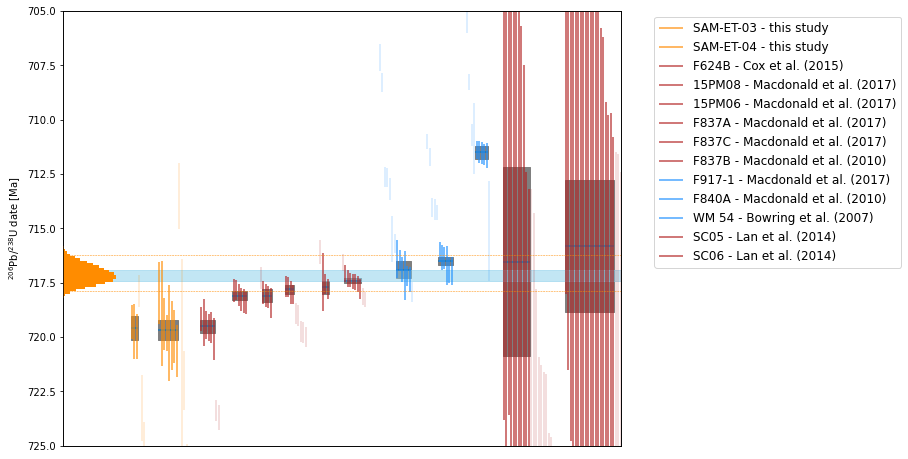

In [28]:
xlim = (-25,200)

# zircons
fig, ax = plot_dates(select_zircon_means, select_zircon_2sigmas, select_include,\
                     select_sample_means, select_sample_2sigmas, select_colours, select_labels,\
                     figsize=(10,8), lineweight=1.5, bbox_to_anchor=(1.05,1))
ax.set_xlim(xlim)
ax.set_xticks([])

# sturtian start
rectangle = matplotlib.patches.Rectangle((xlim[0], 716.9),\
                                         (xlim[1]-xlim[0]), 717.4-716.9, color='skyblue', alpha=0.5)
ax.add_patch(rectangle)

# MC results
twinax = ax.twiny()
twinax.hist(MC_results, bins=30, histtype='stepfilled', orientation='horizontal', color='darkorange')
ax.axhline(MC_2_5, color='darkorange', lw=0.5, ls='--')
ax.axhline(MC_97_5, color='darkorange', lw=0.5, ls='--')
twinax.set_xlim(0,100000)
twinax.set_xticks([])
twinax.set_ylim(ylim)

#plt.savefig('../Manuscript/Figures/Zircons_MC_v2.pdf')

plt.show(fig)

# Zircons with Monte Carlo - with Macdonald et al. (2017) F917-1 Only

## Extract Data Between ylims

In [29]:
ylim = (725,705)

dfs = [SAM_ET_03, SAM_ET_04, Cox2015, F837B, F917_1, F840A, Bowring2007, SC05, SC06]

select_sample_means = [719.58,
                       719.68,
                       719.5,
                       717.4,
                       716.9,
                       716.5,
                       711.5,
                       SC05_mean,
                       SC06_mean]
select_sample_2sigmas = [0.56,
                         0.46,
                         0.3,
                         0.1,
                         0.4,
                         0.2,
                         0.3,
                         SC05_2sigma,
                         SC06_2sigma]
select_colours = ['darkorange',
                  'darkorange',
                  'firebrick',
                  'firebrick',
                  'dodgerblue',
                  'dodgerblue',
                  'dodgerblue',
                  'firebrick',
                  'firebrick']
select_labels = ['SAM-ET-03 - this study',
                 'SAM-ET-04 - this study',
                 'F624B - Cox et al. (2015)',
                 'F837B - Macdonald et al. (2010)',
                 'F917-1 - Macdonald et al. (2017)',
                 'F840A - Macdonald et al. (2010)',
                 'WM 54 - Bowring et al. (2007)',
                 'SC05 - Lan et al. (2014)',
                 'SC06 - Lan et al. (2014)']

select_zircon_means = []
select_zircon_2sigmas = []
select_include = []

for i in range(len(dfs)):
    df = dfs[i].copy()
    
    df['bar_bot'] = df['206Pb/238U'] + df['206Pb/238U_2sigma']
    df['bar_top'] = df['206Pb/238U'] - df['206Pb/238U_2sigma']
    
    df = df[(df['bar_bot']>=ylim[1]) & (df['bar_top']<=ylim[0])]
    
    df.reset_index(inplace=True, drop=True)
    
    select_zircon_means.append(df['206Pb/238U'])
    select_zircon_2sigmas.append(df['206Pb/238U_2sigma'])
    select_include.append(df['include'])

## Plot

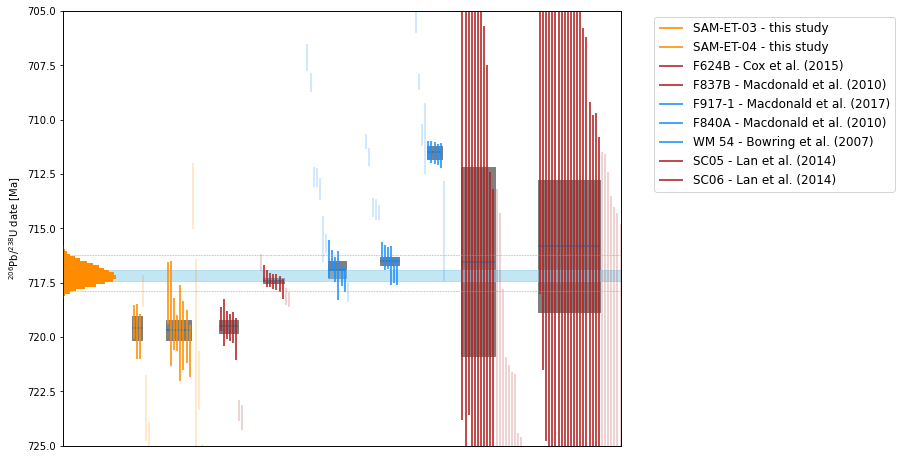

In [30]:
xlim = (-20,160)

# zircons
fig, ax = plot_dates(select_zircon_means, select_zircon_2sigmas, select_include,\
                     select_sample_means, select_sample_2sigmas, select_colours, select_labels,\
                     figsize=(10,8), lineweight=2.0, bbox_to_anchor=(1.05,1))
ax.set_xlim(xlim)
ax.set_xticks([])

# sturtian start
rectangle = matplotlib.patches.Rectangle((xlim[0], 716.9),\
                                         (xlim[1]-xlim[0]), 717.4-716.9, color='skyblue', alpha=0.5)
ax.add_patch(rectangle)

# MC results
twinax = ax.twiny()
twinax.hist(MC_results, bins=30, histtype='stepfilled', orientation='horizontal', color='darkorange')
ax.axhline(MC_2_5, color='darkorange', lw=0.5, ls='--')
ax.axhline(MC_97_5, color='darkorange', lw=0.5, ls='--')
twinax.set_xlim(0,100000)
twinax.set_xticks([])
twinax.set_ylim(ylim)

#plt.savefig('../Manuscript/Figures/Zircons_MC_v3.pdf')

plt.show(fig)

# Updated with Lan et al. (2020)

In [168]:
ylim = (723,714)

dfs = [SAM_ET_03, SAM_ET_04, Cox2015, F837B, F917_1, F840A, Bowring2007, Lan2020]

select_sample_means = [719.58,
                       719.68,
                       719.5,
                       717.4,
                       716.9,
                       716.5,
                       711.5,
                       720.16
                       ]
select_sample_2sigmas = [0.56,
                         0.46,
                         0.3,
                         0.1,
                         0.4,
                         0.2,
                         0.3,
                         1.4]
select_colours = ['#87421F',
                  '#87421F',
                  '#87421F',
                  '#87421F',
                  'dodgerblue',
                  'dodgerblue',
                  'dodgerblue',
                  '#87421F']
select_labels = ['SAM-ET-03 - this study',
                 'SAM-ET-04 - this study',
                 'F624B - Cox et al. (2015)',
                 'F837B - Macdonald et al. (2010)',
                 'F917-1 - Macdonald et al. (2017)',
                 'F840A - Macdonald et al. (2010)',
                 'WM 54 - Bowring et al. (2007)',
                 '2017SC01 - Lan et al. (2020)']

select_zircon_means = []
select_zircon_2sigmas = []
select_include = []

for i in range(len(dfs)):
    df = dfs[i].copy()
    
    df['bar_bot'] = df['206Pb/238U'] + df['206Pb/238U_2sigma']
    df['bar_top'] = df['206Pb/238U'] - df['206Pb/238U_2sigma']
    
    df = df[(df['bar_bot']>=ylim[1]) & (df['bar_top']<=ylim[0])]
    
    df.reset_index(inplace=True, drop=True)
    
    select_zircon_means.append(df['206Pb/238U'])
    select_zircon_2sigmas.append(df['206Pb/238U_2sigma'])
    select_include.append(df['include'])

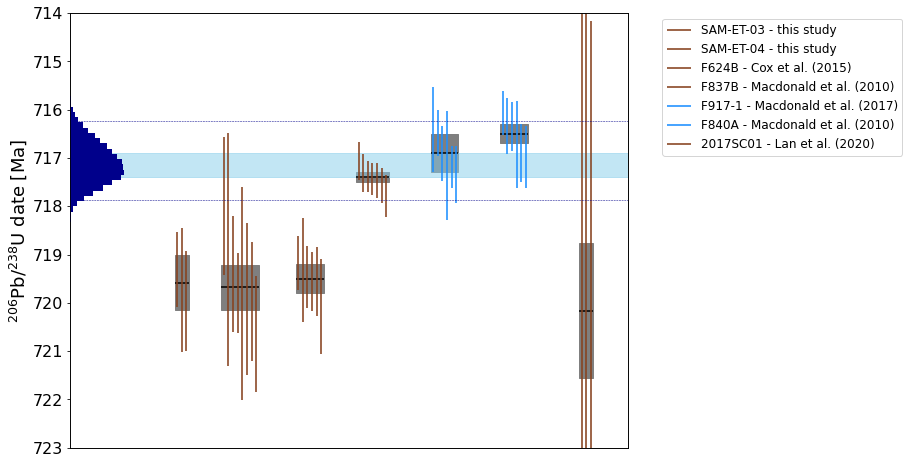

In [170]:
xlim = (-20,100)

# zircons
fig, ax = plot_dates(select_zircon_means, select_zircon_2sigmas, select_include,\
                     select_sample_means, select_sample_2sigmas, select_colours, select_labels,\
                     figsize=(10,8), lineweight=2.0, bbox_to_anchor=(1.05,1))
ax.set_xlim(xlim)
ax.set_xticks([])

# sturtian start
rectangle = matplotlib.patches.Rectangle((xlim[0], 716.9),\
                                         (xlim[1]-xlim[0]), 717.4-716.9, color='skyblue', alpha=0.5)
ax.add_patch(rectangle)
plt.gca().tick_params(axis='both', which='major', labelsize=16)

# MC results
twinax = ax.twiny()
twinax.hist(MC_results, bins=30, histtype='stepfilled', orientation='horizontal', color='darkblue')
ax.axhline(MC_2_5, color='darkblue', lw=0.5, ls='--')
ax.axhline(MC_97_5, color='darkblue', lw=0.5, ls='--')
twinax.set_xlim(0,100000)
twinax.set_xticks([])
twinax.set_ylim(ylim)


plt.savefig('Sturtian_onset.pdf')

plt.show(fig)

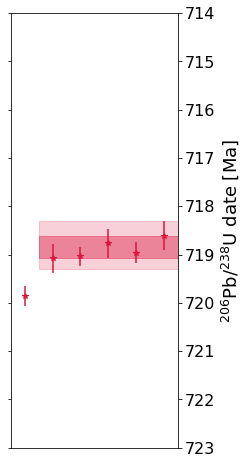

In [172]:

plt.figure(figsize=(3,8))
plt.errorbar([1,2,3,4,5,6],[719.86,719.08,719.04,718.77,718.96,718.61],
             yerr=[0.21,0.30,0.19,0.30,0.21,0.30],fmt='*',color='crimson',label='Franklin LIP zircon dates (Pu et al. 2022)')
plt.ylim(723,714)


rectangle = matplotlib.patches.Rectangle((1.5, 719.08),6, -0.47, color='crimson',alpha=0.4)
plt.gca().add_patch(rectangle)
rectangle = matplotlib.patches.Rectangle((1.5, 719.3),6, -0.99, color='crimson',alpha=0.2)
plt.gca().add_patch(rectangle)

plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_ticks_position('both')
plt.gca().yaxis.set_label_position("right")
plt.gca().set_ylabel('$^{206}$Pb/$^{238}$U date [Ma]',size=18)
plt.gca().tick_params(axis='both', which='major', labelsize=16)
plt.xticks([])
plt.xlim(0.5,6.5)

plt.savefig('Franklin_Geochron.pdf')

In [173]:
(719.08+718.61)/2

718.845

In [174]:
(717.4+716.9)/2

717.15

In [175]:
718.845-717.15

1.69500000000005